In [1]:
!pip install seaborn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable


In [13]:
hyena_table = "/oak/stanford/groups/akundaje/projects/dnalm_benchmark/evals/footprinting_350/likelihoods/hyenadna-large-1m-seqlen-hf.tsv"
hyena_data = pd.read_csv(hyena_table, sep="\t", index_col=0)

gena_table = "/oak/stanford/groups/akundaje/projects/dnalm_benchmark/evals/footprinting_350/likelihoods/gena-lm-bert-large-t2t.tsv"
gena_data = pd.read_csv(gena_table, sep="\t", index_col=0)

dnabert_table = "/oak/stanford/groups/akundaje/projects/dnalm_benchmark/evals/footprinting_350/likelihoods/DNABERT-2-117M.tsv"
dnabert_data = pd.read_csv(dnabert_table, sep="\t", index_col=0)

nt_table = "/oak/stanford/groups/akundaje/projects/dnalm_benchmark/evals/footprinting_350/likelihoods/nucleotide-transformer-v2-500m-multi-species.tsv"
nt_data = pd.read_csv(nt_table, sep="\t", index_col=0)




In [14]:
combined_df = pd.concat([hyena_data, gena_data, dnabert_data, nt_data], axis=1)["Accuracy"]

combined_df.columns = ["HyenaDNA Accuracy", "GENA-LM Accuracy", "DNABERT-2 Accuracy", "Nucleotide Transformer Accuracy"]





<Figure size 4500x4500 with 0 Axes>

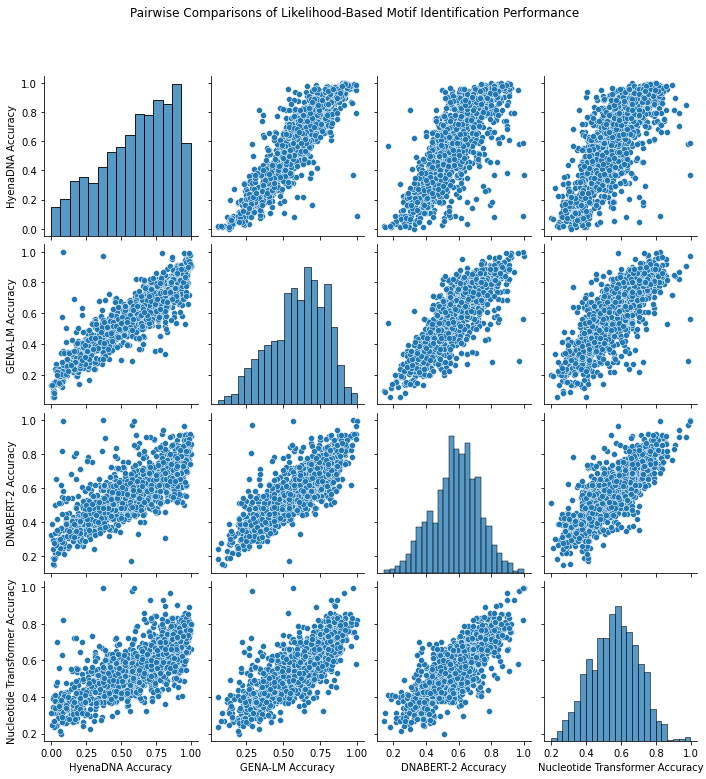

In [15]:
plt.rcParams['figure.figsize']=(15,15)
plt.figure(dpi=300)
g = sns.pairplot(combined_df)
# plt.title("Pairwise Comparisons of Motif Identification Performance")
g.fig.suptitle("Pairwise Comparisons of Likelihood-Based Motif Identification Performance", y=1.08)
g.savefig("/oak/stanford/groups/akundaje/patelas/misc/pairplot_likelihood.png", dpi=300)